<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/DNN_a4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



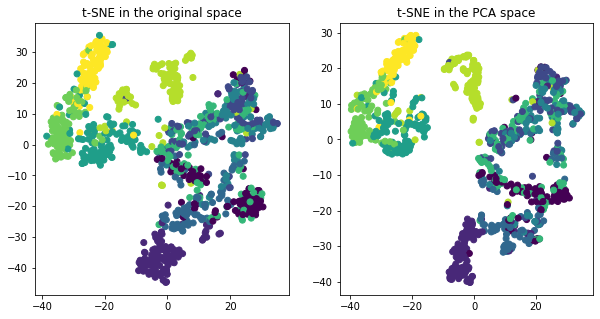

In [ ]:
import torch
import torchvision
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)

# Extract images and labels from the dataset
images, labels = next(iter(trainloader))

# Flatten the images into 1D tensors
images = images.view(images.shape[0], -1)

# Compute PCA
pca = PCA(n_components=8)
pca.fit(images)

# Transform the images into PCA space
pca_images = pca.transform(images)

# Compute t-SNE in the original space
tsne_orig = TSNE(n_components=2, random_state=0)
tsne_orig_results = tsne_orig.fit_transform(images)

# Compute t-SNE in the PCA space
tsne_pca = TSNE(n_components=2, random_state=0)
tsne_pca_results = tsne_pca.fit_transform(pca_images)

# Visualize t-SNE in the original space
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_orig_results[:, 0], tsne_orig_results[:, 1], c=labels)
plt.title('t-SNE in the original space')

# Visualize t-SNE in the PCA space
plt.subplot(1, 2, 2)
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=labels)
plt.title('t-SNE in the PCA space')

plt.show()


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



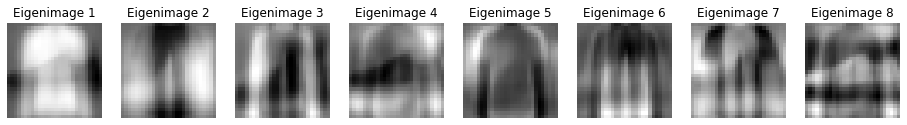

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

data = trainset.data.numpy()
data = data.reshape(data.shape[0], -1)

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_norm = (data - data_mean) / data_std

pca = PCA(n_components=8)
pca.fit(data_norm)
eigenimages = pca.components_.reshape(8, 28, 28)

fig, axs = plt.subplots(1, 8, figsize=(16, 4))
for i in range(8):
    axs[i].imshow(eigenimages[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Eigenimage {i+1}')
plt.show()


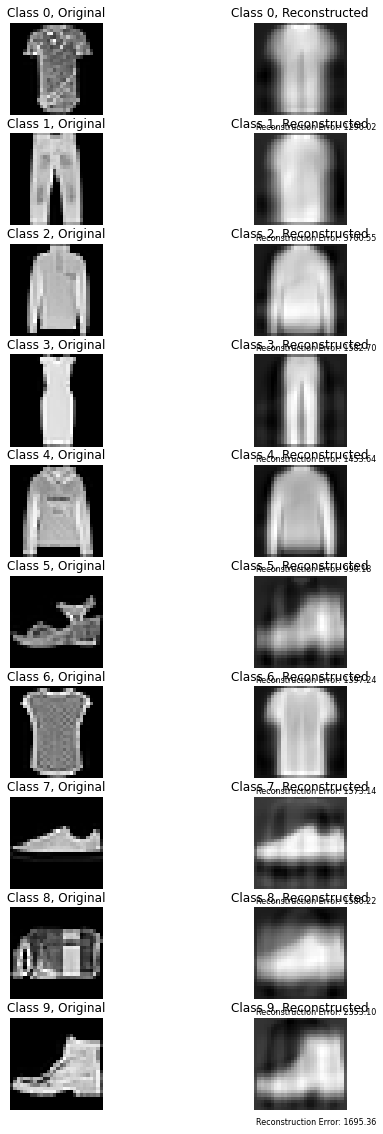

In [ ]:
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

data = trainset.data.numpy()
data = data.reshape(data.shape[0], -1)

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_norm = (data - data_mean) / data_std

pca = PCA(n_components=8)
pca.fit(data_norm)
eigenvectors = pca.components_.T

fig, axs = plt.subplots(10, 2, figsize=(8, 20))
for i in range(10):
    # select a random image from the i-th class
    class_data = data_norm[trainset.targets == i]
    random_idx = np.random.choice(class_data.shape[0])
    image = class_data[random_idx]

    # reconstruct the image using the top 8 eigenvectors
    coeffs = np.dot(eigenvectors.T, image)
    reconstructed_image = np.dot(eigenvectors, coeffs)

    # denormalize the original and reconstructed images
    original_image = (image * data_std) + data_mean
    reconstructed_image = (reconstructed_image * data_std) + data_mean

    # calculate the error between the original and reconstructed images
    error = np.mean((original_image - reconstructed_image) ** 2)

    # plot the original and reconstructed images side by side
    axs[i, 0].imshow(original_image.reshape(28, 28), cmap='gray')
    axs[i, 0].set_title(f'Class {i}, Original')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    axs[i, 1].set_title(f'Class {i}, Reconstructed')
    axs[i, 1].axis('off')
    axs[i, 1].text(0, 32, f'Reconstruction Error: {error:.2f}', fontsize=8)
plt.show()





In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000,
                                          shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.view(60000, -1)

mean = torch.mean(images, dim=0)
std = torch.std(images, dim=0)
images = (images - mean) / std

u, s, v = torch.svd(images)

fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs = axs.flatten()
for i in range(8):
    eig_img = v[i].reshape(28, 28)
    axs[i].imshow(eig_img, cmap='gray')
    axs[i].set_title('Eigenimage {}'.format(i+1))
plt.show()


AttributeError: ignored

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)


X = trainset.data.view(-1, 28*28).float()

X_mean = torch.mean(X, dim=0)
X_std = torch.std(X, dim=0)

X = (X - X_mean) / X_std

U, S, V = torch.svd(X)

eigenimages = U[:, :8].view(-1, 1, 28, 28)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 8, figsize=(16, 2))

for i in range(8):
    axs[i].imshow(eigenimages[i].squeeze(), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Eigenimage {i+1}")

plt.show()


RuntimeError: ignored

In [ ]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST data
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000,
                                          shuffle=False, num_workers=2)

dataiter = iter(trainloader)
images, labels = dataiter.next()

# Reshape data into a 2D array
images = images.numpy().reshape(60000, -1)

# Center the data
mean = np.mean(images, axis=0)
images -= mean

# Compute covariance matrix and perform eigendecomposition
covariance = np.cov(images, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Get the first 8 eigenvectors
eigenimages = eigenvectors[:, :8]

# Visualize the eigenimages
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
for i in range(2):
    for j in range(4):
        idx = i * 4 + j
        eigenvector = eigenimages[:, idx]
        eigenvector = eigenvector.reshape(28, 28)
        axs[i, j].imshow(eigenvector, cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'Eigenimage {idx + 1}')
plt.show()


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



AttributeError: ignored

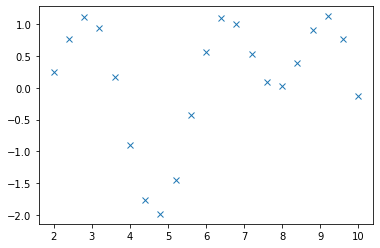

Epoch: 0 loss 4.97376823425293
Epoch: 10 loss 0.1292264312505722
Epoch: 20 loss 0.13346834480762482
Epoch: 30 loss 0.11808225512504578
Epoch: 40 loss 0.09804810583591461
Epoch: 50 loss 0.07966528832912445
Epoch: 60 loss 0.0642784908413887
Epoch: 70 loss 0.0514116995036602
Epoch: 80 loss 0.04127122089266777
Epoch: 90 loss 0.03391854837536812
Epoch: 100 loss 0.029065746814012527
Epoch: 110 loss 0.026722557842731476
Epoch: 120 loss 0.027391662821173668
Epoch: 130 loss 0.03189334273338318
Epoch: 140 loss 0.04148048162460327
Epoch: 150 loss 0.049229271709918976
Epoch: 160 loss 0.04620499163866043
Epoch: 170 loss 0.042906805872917175
Epoch: 180 loss 0.04358595609664917
Epoch: 190 loss 0.04912036284804344
Epoch: 200 loss 0.08260169625282288
Epoch: 210 loss 0.1054549515247345
Epoch: 220 loss 0.10679711401462555
Epoch: 230 loss 0.1182253509759903
Epoch: 240 loss 0.10493342578411102
Epoch: 250 loss 0.08134005963802338
Epoch: 260 loss 0.0743773803114891
Epoch: 270 loss 0.09669937938451767
Epoch: 

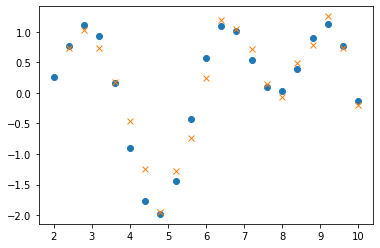

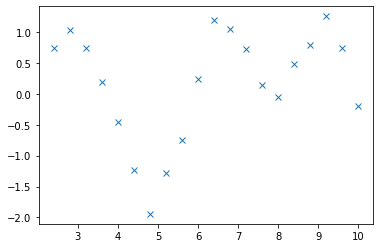

[tensor([[ 0.9118,  0.9795, -0.9542,  0.5342],
        [ 0.0274,  0.1297,  0.1548,  0.6643]], grad_fn=<TanhBackward0>), tensor([[ 0.8760,  0.3820,  0.5361, -0.5886],
        [-0.8365,  0.1957, -0.3409,  0.1116]], grad_fn=<TanhBackward0>), tensor([[-0.7127,  0.2445, -0.0142,  0.5310],
        [ 0.6032,  0.8205, -0.4138, -0.3292]], grad_fn=<TanhBackward0>)]
tensor([[[ 2.0706,  1.6779,  0.7329],
         [-1.2198, -0.1040,  0.4893]],

        [[ 1.9922,  1.1682,  1.6492],
         [ 0.1785,  1.1224, -1.0030]],

        [[-0.3848,  0.5853, -0.8005],
         [ 0.7216,  1.2969,  1.9522]]])


In [ ]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.init as init
import torch.nn as nn
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 9, 8, 1
epochs = 300
seq_length = 20
lr = 0.1
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)+np.cos(data_time_steps*2)
data.resize((seq_length + 1, 1))
plt.plot(data_time_steps,data,'x')
plt.show()
 
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal_(w1, 0.0, 0.4)
w1 =  Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal_(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)
def forward(x, hidden_state, w1, w2):
  xh = torch.cat((input, hidden_state), 1)
  hidden_state = torch.tanh(xh.mm(w1))
  out = hidden_state.mm(w2)
  return  (out, hidden_state)
for i in range(epochs):
  total_loss = 0
  hidden_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
  for j in range(x.size(0)):
    input = x[j:(j+1)]
    target = y[j:(j+1)]
    (pred, hidden_state) = forward(x, hidden_state, w1, w2)
    loss = (pred - target).pow(2).sum()/2
    total_loss += loss
    loss.backward()
    w1.data -= lr * w1.grad.data
    w2.data -= lr * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    hidden_state = Variable(hidden_state.data)
  if i % 10 == 0:
     print("Epoch: {} loss {}".format(i, total_loss.item()))

hidden_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []
 
for i in range(x.size(0)):
  input = x[i:i+1]
  (pred, hidden_state) = forward(x, hidden_state, w1, w2)
  hidden_state = hidden_state
  input = pred
  predictions.append(pred.data.numpy().ravel()[0])
plt.plot(data_time_steps,data,'o',data_time_steps[1:21],predictions,'x')#'r-o' will give red dots
plt.show()# Predicted values should be shifted by one time unit

plt.plot(data_time_steps[1:21],predictions,'x')
plt.show()

input_size = 3
hidden_size = 4
Seq_length = 2
Numb_batches = 3
rnn = nn.RNNCell(input_size, hidden_size)#torch.RNNCell accepts a tensor as input,
#as well as the previous hidden states, and outputs
#the next hidden state for each element in the batch.
input = torch.randn(Numb_batches,Seq_length, input_size)
hx = torch.randn(Seq_length, hidden_size)
output = []
for i in range(Numb_batches):
        hx = rnn(input[i], hx)
        output.append(hx)
print(output)

print(input)


In [ ]:
# vanill RNN to predict next letter
import torch
from torch import nn
import numpy as np
## First, let's define the sentences that we want our model to output when fed with the first word or the first few characters. Then we'll create a dictionary out of all the characters that we have in the sentences and map them to an integer. This will allow us to convert our input characters to their respective integers (char2int) and vice versa (int2char).

text = ['hi how are you','i am good','have a nice day']
# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))
# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))
# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}
print(char2int)
## {'e': 0, 'r': 1, 'c': 2, 'w': 3, ' ': 4, 'y': 5, 'a': 6, 'd': 7, 'g': 8, 'm': 9, 'o': 10, 'h': 11, 'u': 12, 'v': 13, 'i': 14, 'n': 15}
## We will be padding input sentences to make all sentences of same length. This will allow us to input data in batches. The padding will be white spaces

# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))

# Padding

# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '
## Now, lets prepare input/output data for training. Since we want to predict the next character in the sequence at each time step, we'll divide each sentence into: Input data where the last input character should be excluded as it does not need to be fed into the model. For Target/Ground Truth Label, we will prepare it with one time-step ahead of the Input data as this will be the "correct answer" for the model at each time step corresponding to the input data

# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
  input_seq.append(text[i][:-1])
    
    # Remove first character for target sequence
  target_seq.append(text[i][1:])
  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

# Now we convert text to integers for one-hot coding
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]
# Set some parameters
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)
#Now convert to tensors
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)
# Now we define our network
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)

# Define hyperparameters
n_epochs = 200
lr=0.01

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# Training Run
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

#Testing the mode by inputting a sequence
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden
# This function takes the desired output length and input characters as arguments, returning the produced sentence
def sample(model, out_len, start='hi'):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)
sample(model, 12, 'have')

{'d': 0, 'c': 1, 'w': 2, 'n': 3, 'i': 4, 'o': 5, 'y': 6, 'u': 7, 'm': 8, 'g': 9, 'a': 10, 'r': 11, 'e': 12, ' ': 13, 'h': 14, 'v': 15}
Input Sequence: hi how are you
Target Sequence: i how are you 
Input Sequence: i am good     
Target Sequence:  am good      
Input Sequence: have a nice da
Target Sequence: ave a nice day
Epoch: 10/200............. Loss: 2.2557
Epoch: 20/200............. Loss: 2.0990
Epoch: 30/200............. Loss: 1.8545
Epoch: 40/200............. Loss: 1.5257
Epoch: 50/200............. Loss: 1.1594
Epoch: 60/200............. Loss: 0.8325
Epoch: 70/200............. Loss: 0.5762
Epoch: 80/200............. Loss: 0.3915
Epoch: 90/200............. Loss: 0.2691
Epoch: 100/200............. Loss: 0.1930
Epoch: 110/200............. Loss: 0.1465
Epoch: 120/200............. Loss: 0.1174
Epoch: 130/200............. Loss: 0.0987
Epoch: 140/200............. Loss: 0.0861
Epoch: 150/200............. Loss: 0.0772
Epoch: 160/200............. Loss: 0.0707
Epoch: 170/200............. L

'have a nice '